# Task 2

The world indicators dataset compares different countries based on selected attributes.
1. Use  K-means and hierarchical clustering methods to group similar countries
together
2. Use Internal validation metrics to report the cluster quality
3. Report the best clustering solution. Give a detailed list of all the groups and the countries included within the groups
4. Generate three different scatter plots of your choice and color the data points according to the group.Example: “Life expectancy vs GDP”,  “Infant Mortality vs GDP”, etc

## Data Wrangling

In [1]:
# Importing the data file and creating a pandas df
from google.colab import files
uploaded = files.upload()

Saving World Indicators.csv to World Indicators.csv


In [148]:
import pandas as pd
import numpy as np

world_indicators = pd.read_csv('World Indicators.csv')

In [149]:
# Creating a copy of the dataframe to work on
world_indicators_copy = world_indicators.copy()

In [150]:
# Previewing the table
world_indicators_copy.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [151]:
# Doing a describe
world_indicators_copy.describe(include = 'all')

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
count,199.000000,181,181.000000,1.360000e+02,188,185.000000,185,180.000000,188.000000,199.000000,131.000000,197.000000,197.000000,196.000000,191.000000,191.000000,191.000000,206.000000,208,208
unique,NaN,152,NaN,NaN,188,NaN,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,208
top,NaN,40.0%,NaN,NaN,"$199,070,864,638",NaN,$62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,Algeria
freq,NaN,3,NaN,NaN,1,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,1
mean,0.021759,NaN,30.331492,9.223794e+04,NaN,0.067362,NaN,279.283333,0.027340,0.376884,0.122588,72.746193,68.035533,0.958673,0.286963,0.635550,0.077424,0.576728,NaN,NaN
std,0.010721,NaN,56.584357,3.125758e+05,NaN,0.028462,NaN,247.783296,0.025358,0.284034,0.079495,10.091750,8.868297,0.431784,0.107775,0.071489,0.052995,0.244372,NaN,NaN
min,0.008000,NaN,1.000000,7.650000e+02,NaN,0.017000,NaN,12.000000,0.002000,0.000000,0.005000,45.000000,45.000000,0.000000,0.119000,0.475000,0.003000,0.089000,NaN,NaN
25%,0.012000,NaN,9.000000,5.699000e+03,NaN,0.047000,NaN,151.750000,0.007000,0.100000,0.074500,67.000000,62.000000,0.700000,0.189000,0.581000,0.034000,0.377750,NaN,NaN
50%,0.019000,NaN,18.000000,1.808200e+04,NaN,0.065000,NaN,224.000000,0.016000,0.400000,0.106000,76.000000,70.000000,1.000000,0.279000,0.654000,0.056000,0.571500,NaN,NaN
75%,0.028000,NaN,35.000000,5.155725e+04,NaN,0.085000,NaN,327.000000,0.042250,0.600000,0.150000,80.000000,75.000000,1.200000,0.382500,0.684500,0.118000,0.772500,NaN,NaN


In [152]:
world_indicators_copy.shape

### We have 20 columns and 208 rows
### From the describe above, we see that columns have missing variables

(208, 20)

In [153]:
# Checking if the data types of all columns make sense
world_indicators_copy.dtypes

### It can be seen that some columns have the data type object. Since all the attribute types required for the model is numerical, we need to convert them to float

Birth Rate                float64
Business Tax Rate          object
Days to Start Business    float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

### Converting object data type columns to float

In [154]:
# Replacing the '%' from Business Tax Rate
world_indicators_copy["Business Tax Rate"] = world_indicators_copy["Business Tax Rate"].str.replace('%', '')

# Replacing ',' and '$' from GDP
world_indicators_copy["GDP"] = world_indicators_copy["GDP"].str.replace(',', '')
world_indicators_copy["GDP"] = world_indicators_copy["GDP"].str.replace('$', '')

# Replacing the '$' and ',' from Health Exp/Capita
world_indicators_copy["Health Exp/Capita"] = world_indicators_copy["Health Exp/Capita"].str.replace('$', '')
world_indicators_copy["Health Exp/Capita"] = world_indicators_copy["Health Exp/Capita"].str.replace(',', '')

# Converting object data type columns to float
world_indicators_copy["Business Tax Rate"] = pd.to_numeric(world_indicators_copy["Business Tax Rate"])
world_indicators_copy["GDP"] = pd.to_numeric(world_indicators_copy["GDP"])
world_indicators_copy["Health Exp/Capita"] = pd.to_numeric(world_indicators_copy["Health Exp/Capita"])

# Previewing the df
world_indicators_copy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,41852.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,13576.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,3761.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,2215.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,NaN,1.039576e+10,0.064,39.0,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


### Handling NULL values

In [155]:
### Getting the sql library as it is easier to manipulate data in SQL
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [157]:
q = """SELECT round(count(case when `Birth Rate` is NULL then 1 else NULL end)*100/208,2) as birth_rate_null_perc,
              round(count(case when `Business Tax Rate` is NULL then 1 else NULL end)*100/208,2) as business_tax_rate_null_perc,
              round(count(case when `Days to Start Business` is NULL then 1 else NULL end)*100/208,2) as days_to_start_bussiness_null_perc,
              round(count(case when `Energy Usage` is NULL then 1 else NULL end)*100/208,2) as energy_usage_null_perc,
              round(count(case when `GDP` is NULL then 1 else NULL end)*100/208,2) as gdp_null_perc,
              round(count(case when `Health Exp % GDP` is NULL then 1 else NULL end)*100/208,2) as health_exp_perc_gdp_null_perc,
              round(count(case when `Health Exp/Capita` is NULL then 1 else NULL end)*100/208,2) as health_exp_per_capita_null_perc,
              round(count(case when `Hours to do Tax` is NULL then 1 else NULL end)*100/208,2) as hours_to_do_tax_null_perc,
              round(count(case when `Infant Mortality Rate` is NULL then 1 else NULL end)*100/208,2) as infant_mortality_rate_null_perc,
              round(count(case when `Internet Usage` is NULL then 1 else NULL end)*100/208,2) as internet_usage_null_perc,
              round(count(case when `Lending Interest` is NULL then 1 else NULL end)*100/208,2) as lending_interest_null_perc,
              round(count(case when `Life Expectancy Female` is NULL then 1 else NULL end)*100/208,2) as life_expectancy_null_perc,
              round(count(case when `Life Expectancy Male` is NULL then 1 else NULL end)*100/208,2) as life_expectancy_male_null_perc,
              round(count(case when `Mobile Phone Usage` is NULL then 1 else NULL end)*100/208,2) as mobile_phone_usage_null_perc,
              round(count(case when `Population 0-14` is NULL then 1 else NULL end)*100/208,2) as population_0_14_null_perc,
              round(count(case when `Population 15-64` is NULL then 1 else NULL end)*100/208,2) as population_15_64_null_perc,
              round(count(case when `Population 65+` is NULL then 1 else NULL end)*100/208,2) as population_above_65_null_perc,
              round(count(case when `Population Urban` is NULL then 1 else NULL end)*100/208,2) as population_urban_null_perc,
              round(count(case when `Region` is NULL then 1 else NULL end)*100/208,2) as region_null_perc,
              round(count(case when `Country` is NULL then 1 else NULL end)*100/208,2) as country_null_perc

       FROM world_indicators_copy;"""

null_perc = pysqldf(q)
null_perc

,birth_rate_null_perc,business_tax_rate_null_perc,days_to_start_bussiness_null_perc,energy_usage_null_perc,gdp_null_perc,health_exp_perc_gdp_null_perc,health_exp_per_capita_null_perc,hours_to_do_tax_null_perc,infant_mortality_rate_null_perc,internet_usage_null_perc,lending_interest_null_perc,life_expectancy_null_perc,life_expectancy_male_null_perc,mobile_phone_usage_null_perc,population_0_14_null_perc,population_15_64_null_perc,population_above_65_null_perc,population_urban_null_perc,region_null_perc,country_null_perc
0,4.0,12.0,12.0,34.0,9.0,11.0,11.0,13.0,9.0,4.0,37.0,5.0,5.0,5.0,8.0,8.0,8.0,0.0,0.0,0.0


In [158]:
### As the Energy Usage and Lending Interest have 34% and 37% of their data as NULLs respectively, we can drop these columns (not consider them as variables for clustering)

world_indicators_copy = world_indicators_copy.drop('Energy Usage', axis=1)
world_indicators_copy = world_indicators_copy.drop('Lending Interest', axis=1)
print(world_indicators_copy.shape)
world_indicators_copy.head()

(208, 18)


,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1006c1f050>,
      dtype=object)

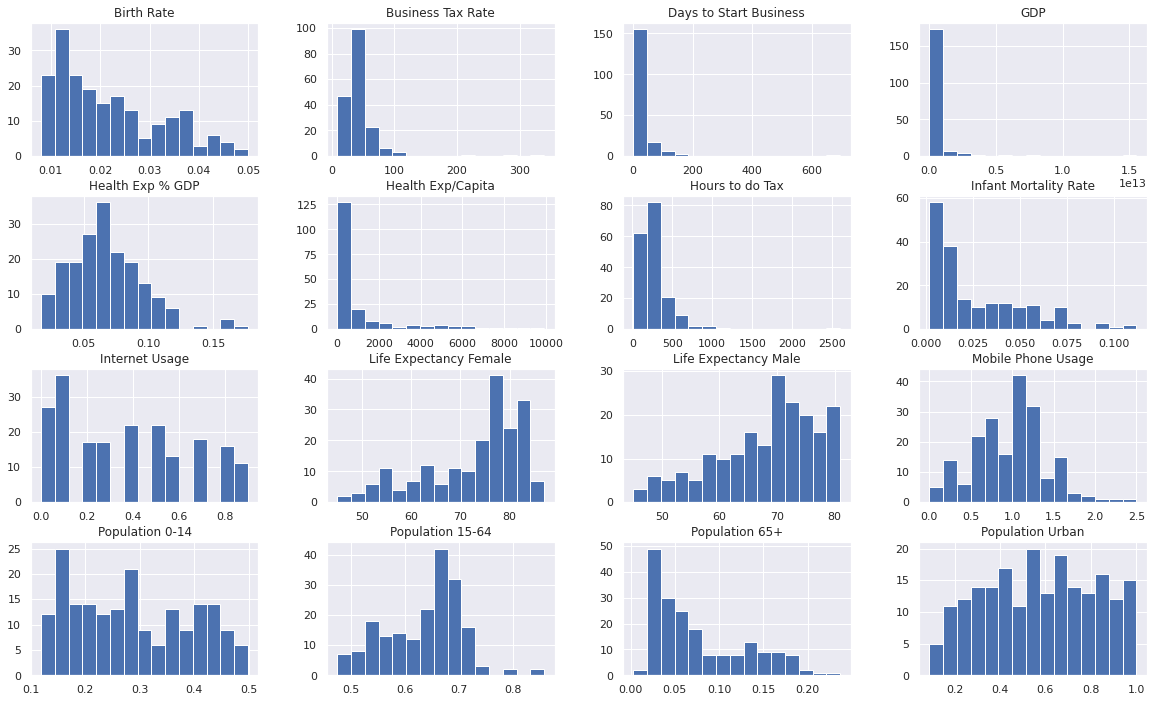

In [159]:
world_indicators_copy.hist(bins=15, figsize=(20, 12))

### The following columns have an extreme skew in the distribution:
### Birth Rate, Business Tax Rate, Days to Start Business, GDP, Health Exp/Capita, Hours to Do Tax, Infant Mortality Rate, Life Expectancy Female, Life Expectancy Male, Population 14-65, Population 65+

### The following have a balanced distribution:
### Health Exp % GDP, Internet Usage, Mobile Phone Usage, Population 0-14, Population Urban

In [160]:
region_median=world_indicators_copy.groupby(world_indicators_copy['Region'], as_index=False).median()
region_median

,Region,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,Africa,0.037,43.70,25.5,1.230407e+10,0.060,62.0,270.0,0.0580,0.10,59.0,57.0,0.6,0.423,0.549,0.031,0.3930
1,Asia,0.020,34.30,21.5,5.225117e+10,0.044,99.0,256.0,0.0255,0.20,74.0,68.0,1.0,0.271,0.670,0.051,0.4520
2,Europe,0.011,39.55,12.5,1.634217e+11,0.083,2147.0,208.5,0.0040,0.70,82.0,77.0,1.2,0.153,0.677,0.158,0.6930
3,Middle East,0.021,27.70,12.0,1.652024e+11,0.035,646.0,151.0,0.0100,0.50,77.0,74.0,1.2,0.257,0.688,0.029,0.8270
4,Oceania,0.023,34.40,17.0,7.857453e+08,0.077,219.0,128.0,0.0200,0.25,75.0,69.0,0.6,0.330,0.631,0.051,0.5220
5,The Americas,0.017,41.20,19.0,2.381244e+10,0.068,487.0,245.0,0.0140,0.40,77.0,72.0,1.0,0.272,0.651,0.070,0.7065


In [161]:
### Replacing the NULL values in columns with Region's median (instead of the entire data's median) as a country belonging to a region is most likely to behave similar and the populated value will probably lie close to the original value.

q = """SELECT coalesce(a.`Birth Rate`,b.`Birth Rate`) as `Birth Rate`,
              coalesce(a.`Business Tax Rate`,b.`Business Tax Rate`) as `Business Tax Rate`,
              coalesce(a.`Days to Start Business`,b.`Days to Start Business`) as `Days to Start Business`,
              coalesce(a.`GDP`, b.`GDP`) as `GDP`,
              coalesce(a.`Health Exp % GDP`,b.`Health Exp % GDP`) as `Health Exp % GDP`,
              coalesce(a.`Health Exp/Capita`,b.`Health Exp/Capita`) as `Health Exp/Capita`,
              coalesce(a.`Hours to do Tax`,b.`Hours to do Tax`) as `Hours to do Tax`,
              coalesce(a.`Infant Mortality Rate`,b.`Infant Mortality Rate`) as `Infant Mortality Rate`,
              coalesce(a.`Internet Usage`,b.`Internet Usage`) as `Internet Usage`,
              coalesce(a.`Life Expectancy Female`,b.`Life Expectancy Female`) as `Life Expectancy Female`,
              coalesce(a.`Life Expectancy Male`,b.`Life Expectancy Male`) as `Life Expectancy Male`,
              coalesce(a.`Mobile Phone Usage`,b.`Mobile Phone Usage`) as `Mobile Phone Usage`,
              coalesce(a.`Population 0-14`, b.`Population 0-14`) as `Population 0-14`,
              coalesce(a.`Population 15-64`, b.`Population 15-64`) as `Population 15-64`,
              coalesce(a.`Population 65+`, b.`Population 65+`) as `Population 65+`,
              coalesce(a.`Population Urban`, b.`Population Urban`) as `Population Urban`,
              a.`Region`,
              a.`Country`

       FROM world_indicators_copy a
       LEFT JOIN region_median b
              ON a.Region = b.Region"""

world_indicators_copy = pysqldf(q)
world_indicators_copy.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [162]:
world_indicators_copy.describe(include='all')

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
count,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208,208
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,208
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,Algeria
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,1
mean,0.021524,43.921154,28.776442,3.465836e+11,0.067471,1044.379808,271.990385,0.026091,0.377644,73.024038,68.288462,0.955288,0.282293,0.637495,0.079596,0.577911,NaN,NaN
std,0.010583,33.632917,52.938021,1.331441e+12,0.027111,1795.209009,231.725855,0.024486,0.280687,9.908002,8.719652,0.422748,0.106175,0.068955,0.052930,0.243487,NaN,NaN
min,0.008000,8.400000,1.000000,1.707000e+08,0.017000,12.000000,12.000000,0.002000,0.000000,45.000000,45.000000,0.000000,0.119000,0.475000,0.003000,0.089000,NaN,NaN
25%,0.012000,31.875000,10.000000,7.225216e+09,0.049000,93.750000,157.750000,0.007000,0.100000,68.000000,63.000000,0.700000,0.182250,0.586000,0.035000,0.379250,NaN,NaN
50%,0.019000,39.550000,18.500000,2.496123e+10,0.068000,355.500000,227.000000,0.015000,0.400000,77.000000,70.500000,1.000000,0.272000,0.653500,0.061000,0.574000,NaN,NaN
75%,0.028000,46.050000,32.000000,1.699945e+11,0.083000,915.500000,303.750000,0.039000,0.600000,80.000000,75.000000,1.200000,0.372250,0.680250,0.125250,0.771500,NaN,NaN


In [163]:
world_indicators_copy.describe(include='all')

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
count,208.000000,208.000000,208.000000,2.080000e+02,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208,208
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,208
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,Algeria
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,1
mean,0.021524,43.921154,28.776442,3.465836e+11,0.067471,1044.379808,271.990385,0.026091,0.377644,73.024038,68.288462,0.955288,0.282293,0.637495,0.079596,0.577911,NaN,NaN
std,0.010583,33.632917,52.938021,1.331441e+12,0.027111,1795.209009,231.725855,0.024486,0.280687,9.908002,8.719652,0.422748,0.106175,0.068955,0.052930,0.243487,NaN,NaN
min,0.008000,8.400000,1.000000,1.707000e+08,0.017000,12.000000,12.000000,0.002000,0.000000,45.000000,45.000000,0.000000,0.119000,0.475000,0.003000,0.089000,NaN,NaN
25%,0.012000,31.875000,10.000000,7.225216e+09,0.049000,93.750000,157.750000,0.007000,0.100000,68.000000,63.000000,0.700000,0.182250,0.586000,0.035000,0.379250,NaN,NaN
50%,0.019000,39.550000,18.500000,2.496123e+10,0.068000,355.500000,227.000000,0.015000,0.400000,77.000000,70.500000,1.000000,0.272000,0.653500,0.061000,0.574000,NaN,NaN
75%,0.028000,46.050000,32.000000,1.699945e+11,0.083000,915.500000,303.750000,0.039000,0.600000,80.000000,75.000000,1.200000,0.372250,0.680250,0.125250,0.771500,NaN,NaN


In [164]:
print(world_indicators_copy['Region'].unique())
# Dropping region as it is a categorical field
world_indicators_copy = world_indicators_copy.drop('Region', axis=1)

['Africa' 'Asia' 'Europe' 'Middle East' 'Oceania' 'The Americas']


In [165]:
### Making country the index as it is the primary object identifier
world_indicators_copy=world_indicators_copy.set_index('Country')
world_indicators_copy.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
Country,,,,,,,,,,,,,,,,
Algeria,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682
Angola,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409
Benin,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423
Botswana,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565
Burkina Faso,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265


### Scaling data to create clusters

In [166]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
world_indicators_scaled = scaler.fit_transform(world_indicators_copy.to_numpy())
world_indicators_scaled = pd.DataFrame(world_indicators_scaled, index=world_indicators_copy.index, columns=['Birth Rate', 'Business Tax Rate', 'Days to Start Business', 'GDP', 'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate', 'Life Expectancy Female', 'Life Expectancy Male', 'Population 15-64', 'Population 65+', 'Health Exp % GDP', 'Internet Usage', 'Mobile Phone Usage', 'Population 0-14', 'Population Urban'])
print("Scaled Dataset Using MinMaxScaler")
world_indicators_scaled.head()

Scaled Dataset Using MinMaxScaler


,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Life Expectancy Female,Life Expectancy Male,Population 15-64,Population 65+,Health Exp % GDP,Internet Usage,Mobile Phone Usage,Population 0-14,Population Urban
Country,,,,,,,,,,,,,,,,
Algeria,0.404762,0.192319,0.034632,0.012804,0.16875,0.022332,0.169629,0.190909,0.111111,0.642857,0.666667,0.36,0.402632,0.539267,0.188034,0.650933
Angola,0.904762,0.132144,0.093795,0.006692,0.10625,0.016774,0.104328,0.954545,0.111111,0.190476,0.138889,0.20,0.942105,0.062827,0.089744,0.351262
Benin,0.690476,0.173874,0.040404,0.000459,0.17500,0.002223,0.099691,0.527273,0.000000,0.357143,0.361111,0.32,0.823684,0.167539,0.111111,0.366630
Botswana,0.380952,0.033565,0.085137,0.000973,0.21875,0.039612,0.054096,0.336364,0.111111,0.023810,0.055556,0.60,0.581579,0.392670,0.136752,0.522503
Burkina Faso,0.809524,0.106138,0.017316,0.000658,0.29375,0.002728,0.099691,0.600000,0.000000,0.261905,0.277778,0.20,0.892105,0.109948,0.094017,0.193194


### Using silhouette analysis to select optimum number of clusters

In [167]:
# Importing required libraries

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [168]:
### Using elbow method for reference
sse = []
for k in range(1,11):
  km = KMeans(n_clusters=k)
  km.fit(world_indicators_scaled)
  sse.append(km.inertia_)

In [169]:
### List of sum of squared errors
sse

[140.68519113273584,
 67.90197556301806,
 52.28188414009979,
 44.2755680070599,
 40.361472936544295,
 37.33047923249367,
 35.24018060618075,
 33.71230946430201,
 32.24741077742956,
 31.11059872339519]

Text(0, 0.5, 'Sum of Squared Error')

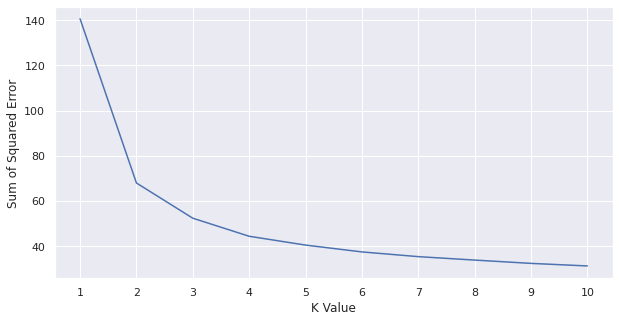

In [170]:
### Plotting SSE vs Value of K in KMeans to identify the elbow
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Error')

### Elbow can be seen at 2

In [171]:
### Using the silhoutte analysis to determine the optimum number of clusters

# Importing required modules
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
%matplotlib inline

In [172]:
from sklearn.metrics import silhouette_score

In [173]:
km.labels_

array([2, 3, 7, 7, 3, 3, 3, 3, 3, 7, 3, 7, 3, 9, 1, 3, 7, 7, 7, 7, 7, 3,
       3, 7, 3, 9, 2, 7, 3, 3, 7, 4, 2, 3, 9, 3, 3, 9, 9, 7, 4, 3, 3, 9,
       3, 7, 3, 7, 3, 2, 3, 3, 7, 3, 8, 4, 1, 1, 6, 1, 4, 8, 6, 1, 1, 5,
       4, 2, 0, 1, 1, 6, 2, 4, 2, 1, 1, 1, 1, 6, 4, 1, 4, 7, 1, 1, 4, 4,
       0, 5, 8, 5, 0, 8, 0, 0, 0, 5, 0, 0, 5, 5, 5, 0, 0, 5, 0, 0, 0, 0,
       0, 0, 8, 5, 8, 0, 8, 5, 8, 5, 5, 0, 0, 8, 8, 0, 8, 0, 0, 0, 5, 5,
       2, 8, 5, 6, 2, 1, 6, 2, 6, 6, 2, 6, 2, 1, 6, 7, 2, 5, 1, 4, 6, 9,
       9, 9, 2, 5, 7, 1, 1, 1, 1, 4, 6, 4, 6, 4, 1, 6, 1, 6, 5, 6, 6, 2,
       2, 8, 6, 2, 2, 2, 2, 6, 4, 1, 1, 9, 1, 4, 2, 1, 2, 2, 2, 6, 2, 4,
       4, 2, 4, 2, 4, 2, 5, 6, 2, 6], dtype=int32)

In [174]:
### Creating clusters using KMeans algorithm for values of K between 1 to 10
KMeans_per_k = [KMeans(n_clusters=k).fit(world_indicators_scaled) for k in range(1,11)]
### Calculating silhouette scores for all KMeans clusters created above (from k=2 to 10 - as at least 2 clusters are required)
silhouette_scores = [silhouette_score(world_indicators_scaled, model.labels_) for model in KMeans_per_k[1:]]

In [175]:
silhouette_scores

[0.4241444357454464,
 0.30280636113105813,
 0.2564105379830333,
 0.2520482682105559,
 0.22615808476324445,
 0.19465402909760293,
 0.1904558726964306,
 0.1888118116118357,
 0.17992244872652735]

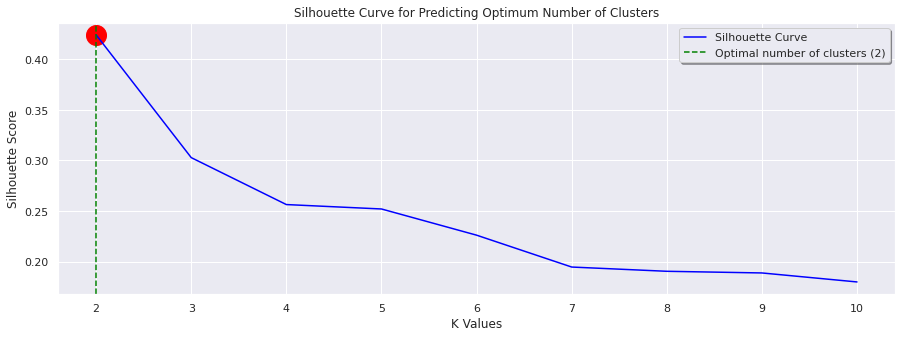

In [176]:
### Plotting the silhouette scores in a graph for better visualization
rcParams['figure.figsize'] = 15,5
plt.plot(range(2,11), silhouette_scores, color='blue', label='Silhouette Curve')
plt.xlabel("K Values")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Curve for Predicting Optimum Number of Clusters")

### Calculating the optimum number of clusters
k = np.argmax(silhouette_scores)+2

plt.axvline(x=k, linestyle='--', c='green', label=f'Optimal number of clusters ({k})')

plt.scatter(k, silhouette_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.show()

### We see that the optimum number of clusters for our data is 2

In [177]:
from sklearn.cluster import AgglomerativeClustering
### Creating clusters using hierarchical algorithm for values of K between 1 to 10
hierarchical_per_k = [AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(world_indicators_scaled) for k in range(1,11)]
### Calculating silhouette scores for all KMeans clusters created above (from k=2 to 10 - as at least 2 clusters are required)
silhouette_scores = [silhouette_score(world_indicators_scaled, model.labels_) for model in hierarchical_per_k[1:]]

In [178]:
silhouette_scores

[0.409878604447402,
 0.28440653830824275,
 0.24109757365955092,
 0.2235881728108885,
 0.2080100947403173,
 0.21648477787045495,
 0.16563350980149696,
 0.1673230218917652,
 0.16588557850691335]

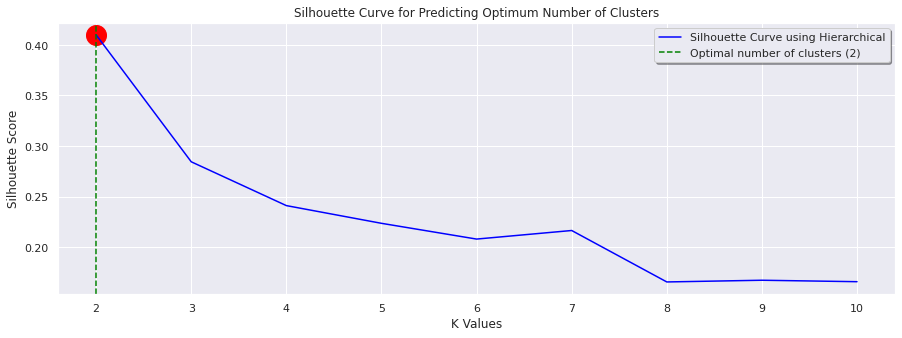

In [179]:
### Plotting the silhouette scores in a graph for better visualization
rcParams['figure.figsize'] = 15,5
plt.plot(range(2,11), silhouette_scores, color='blue', label='Silhouette Curve using Hierarchical')
plt.xlabel("K Values")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Curve for Predicting Optimum Number of Clusters")

### Calculating the optimum number of clusters
k = np.argmax(silhouette_scores)+2

plt.axvline(x=k, linestyle='--', c='green', label=f'Optimal number of clusters ({k})')

plt.scatter(k, silhouette_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.show()

### We see that the optimum number of clusters for our data is 2 using hierarchical clustering as well

## Using KMeans and Hierarchical methods to cluster data

#### KMeans

In [180]:
km_wi = KMeans(n_clusters=2)
km_wi

KMeans(n_clusters=2)

In [181]:
km_cluster = km_wi.fit_predict(world_indicators_scaled)
km_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [182]:
world_indicators_scaled['Group_KMeans'] = km_cluster
kw=world_indicators_scaled

In [183]:
### Checking number of countries in each group

world_indicators_scaled['Country'] = world_indicators_scaled.index
world_indicators_scaled.groupby(world_indicators_scaled['Group_KMeans'], as_index=False)['Country'].count()

,Group_KMeans,Country
0,0,125
1,1,83


#### Hierarchical

In [184]:
world_indicators_scaled = world_indicators_scaled.drop('Country', axis=1)
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 

### Taking every numerical column as a variable for hierarchical cluster except Group_KMeans that was created above
h_cluster=cluster.fit_predict(world_indicators_scaled.loc[:, world_indicators_scaled.columns != 'Group_KMeans'])

In [185]:
world_indicators_scaled['Group_hierarchical'] = h_cluster
world_indicators_scaled.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Life Expectancy Female,Life Expectancy Male,Population 15-64,Population 65+,Health Exp % GDP,Internet Usage,Mobile Phone Usage,Population 0-14,Population Urban,Group_KMeans,Group_hierarchical
Country,,,,,,,,,,,,,,,,,,
Algeria,0.404762,0.192319,0.034632,0.012804,0.16875,0.022332,0.169629,0.190909,0.111111,0.642857,0.666667,0.36,0.402632,0.539267,0.188034,0.650933,1,0
Angola,0.904762,0.132144,0.093795,0.006692,0.10625,0.016774,0.104328,0.954545,0.111111,0.190476,0.138889,0.20,0.942105,0.062827,0.089744,0.351262,1,0
Benin,0.690476,0.173874,0.040404,0.000459,0.17500,0.002223,0.099691,0.527273,0.000000,0.357143,0.361111,0.32,0.823684,0.167539,0.111111,0.366630,1,0
Botswana,0.380952,0.033565,0.085137,0.000973,0.21875,0.039612,0.054096,0.336364,0.111111,0.023810,0.055556,0.60,0.581579,0.392670,0.136752,0.522503,1,0
Burkina Faso,0.809524,0.106138,0.017316,0.000658,0.29375,0.002728,0.099691,0.600000,0.000000,0.261905,0.277778,0.20,0.892105,0.109948,0.094017,0.193194,1,0


In [186]:
### Checking number of countries in each group

world_indicators_scaled['Country'] = world_indicators_scaled.index
world_indicators_scaled.groupby(world_indicators_scaled['Group_hierarchical'], as_index=False)['Country'].count()

,Group_hierarchical,Country
0,0,91
1,1,117


In [187]:
### Creating datasets for each modeling type for validation
world_indicators_scaled = world_indicators_scaled.drop('Country', axis=1)
hierarchical_world = world_indicators_scaled.loc[:, world_indicators_scaled.columns != 'Group_KMeans']
KMeans_world = world_indicators_scaled.loc[:, world_indicators_scaled.columns != 'Group_hierarchical']
world_indicators_for_checking = KMeans_world.loc[:, KMeans_world.columns != 'Group_KMeans']

## Use internal validation metrics to report the cluster quality

In [188]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [189]:
# Within cluster evaluation
from sklearn.cluster import KMeans
mdl_wi_kmeans = KMeans(n_clusters=2)
mdl_wi_kmeans.fit(world_indicators_for_checking)
print('SSE KMeans Data: '+ str(mdl_wi_kmeans.inertia_))

SSE KMeans Data: 67.90197556301806


In [190]:
mdl_wi_hierarchical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
mdl_wi_hierarchical.fit(world_indicators_for_checking)

AgglomerativeClustering()

#### CH scores

In [191]:
from sklearn import metrics
print('CH score for KMeans Clustering: '+ str(metrics.calinski_harabasz_score(world_indicators_for_checking, mdl_wi_kmeans.labels_)))
print('CH score for Hierarchical Clustering: '+ str(metrics.calinski_harabasz_score(world_indicators_for_checking, mdl_wi_hierarchical.labels_)))

### We notice that the CH score for KMeans clustering is higher compared to hierarchical clustering by 3.6%

CH score for KMeans Clustering: 220.80863307794232
CH score for Hierarchical Clustering: 213.09542579242893


#### Dunn Index

In [192]:
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [193]:
from validclust import dunn
from sklearn.metrics import pairwise_distances

In [194]:
dist = pairwise_distances(world_indicators_for_checking)
dunn_KMeans = dunn(dist,  mdl_wi_kmeans.labels_)
dunn_hierarchical = dunn(dist,  mdl_wi_hierarchical.labels_)
print('DI for KMeans clustering: '+ str(dunn_KMeans))
print('DI for hierarchical clustering: '+ str(dunn_hierarchical))

### We notice that the Dunn index is higher for hierarchical clustering by 18.235%

DI for KMeans clustering: 0.12048730766930328
DI for hierarchical clustering: 0.14245079796932603


#### Silhouette score

In [195]:
from sklearn import metrics
print('SH Score for KMeans clustering: '+ str(metrics.silhouette_score(world_indicators_for_checking, mdl_wi_kmeans.labels_)))
print('SH Score hierarchical clustering: '+ str(metrics.silhouette_score(world_indicators_for_checking, mdl_wi_hierarchical.labels_)))

SH Score for KMeans clustering: 0.4241444357454464
SH Score hierarchical clustering: 0.409878604447402


## Report the best clustering solution

#### K-Means clustering is the better solution

Using silhouette and elbow methods, it was determined that 2 is the optimum number of clusters. On comparing clusters created using KMeans and hierarchical algorithms using dunn index and CH score, it can be seen that the dunn index of the hierarchical model is higher by 18.23% and the CH score of KMeans is higher by 3.6%. The SH score for K-Means is higher as well, indicating better clusters.Hence, K-Means model can be considered the better clustering solution as 2 of the cluster quality indicators are higher than the hierarchical.

In [196]:
pd.set_option('display.max_rows', None)

world_indicators_scaled.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Life Expectancy Female,Life Expectancy Male,Population 15-64,Population 65+,Health Exp % GDP,Internet Usage,Mobile Phone Usage,Population 0-14,Population Urban,Group_KMeans,Group_hierarchical
Country,,,,,,,,,,,,,,,,,,
Algeria,0.404762,0.192319,0.034632,0.012804,0.16875,0.022332,0.169629,0.190909,0.111111,0.642857,0.666667,0.36,0.402632,0.539267,0.188034,0.650933,1,0
Angola,0.904762,0.132144,0.093795,0.006692,0.10625,0.016774,0.104328,0.954545,0.111111,0.190476,0.138889,0.20,0.942105,0.062827,0.089744,0.351262,1,0
Benin,0.690476,0.173874,0.040404,0.000459,0.17500,0.002223,0.099691,0.527273,0.000000,0.357143,0.361111,0.32,0.823684,0.167539,0.111111,0.366630,1,0
Botswana,0.380952,0.033565,0.085137,0.000973,0.21875,0.039612,0.054096,0.336364,0.111111,0.023810,0.055556,0.60,0.581579,0.392670,0.136752,0.522503,1,0
Burkina Faso,0.809524,0.106138,0.017316,0.000658,0.29375,0.002728,0.099691,0.600000,0.000000,0.261905,0.277778,0.20,0.892105,0.109948,0.094017,0.193194,1,0


In [197]:
q = """SELECT case when Group_KMeans = 0 then 'A' 
                   else 'B'
              end as Cluster,
              Country

       FROM world_indicators_scaled
       group by case when Group_KMeans = 0 then 'A' else 'B' end,
                Country
       order by Cluster;"""

list_of_countries_by_group = pysqldf(q)
list_of_countries_by_group.head()

,Cluster,Country
0,A,Albania
1,A,American Samoa
2,A,Andorra
3,A,Antigua and Barbuda
4,A,Argentina


In [198]:
### List of countries in A
list_of_countries_by_group[list_of_countries_by_group['Cluster']=='A']

,Cluster,Country
0,A,Albania
1,A,American Samoa
2,A,Andorra
3,A,Antigua and Barbuda
4,A,Argentina
5,A,Armenia
6,A,Aruba
7,A,Australia
8,A,Austria
9,A,Azerbaijan


In [199]:
### List of countries in B
list_of_countries_by_group[list_of_countries_by_group['Cluster']=='B'].reset_index(drop=True)

,Cluster,Country
0,B,Afghanistan
1,B,Algeria
2,B,Angola
3,B,Bangladesh
4,B,Belize
5,B,Benin
6,B,Bhutan
7,B,Bolivia
8,B,Botswana
9,B,Burkina Faso


## Three different scatter plots and color the data points according to the group

Countries in cluster A seem better off than the ones in B. The same can be inferred from the scatter plots below.

In [200]:
### Creating df for plotting
world_indicators_copy.head()
# list_of_countries_by_group

q = """SELECT a.*,
              b.Cluster

       FROM world_indicators_copy a
       LEFT JOIN list_of_countries_by_group b
              ON a.Country = b.Country;"""

df = pysqldf(q)
df.head()

,Country,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Cluster
0,Algeria,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,B
1,Angola,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,B
2,Benin,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,B
3,Botswana,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,B
4,Burkina Faso,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,B


In [212]:
df.groupby(df['Cluster'], as_index=False)['Country'].count()

,Cluster,Country
0,A,125
1,B,83


Text(0.5, 1.0, 'Population 15-64 vs Mobile Phone Usage')

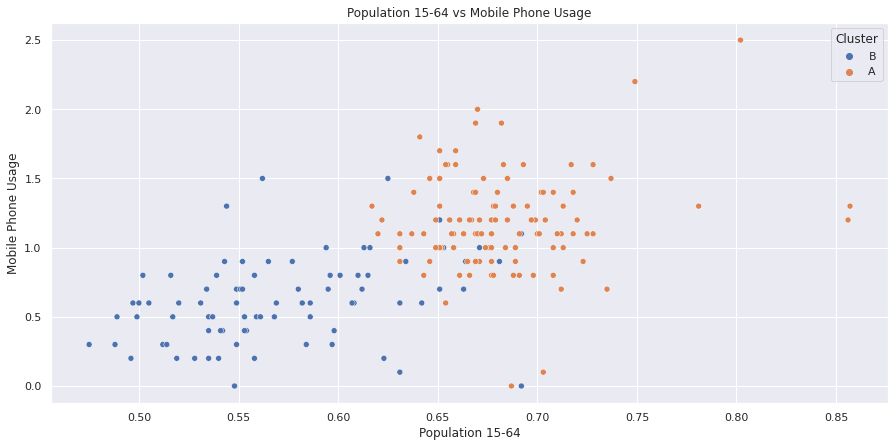

In [208]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(y=df['Mobile Phone Usage'], x=df['Population 15-64'], data=df, hue=df['Cluster']).set_title('Population 15-64 vs Mobile Phone Usage')

### Countries in cluster A have a higher population of 14-65 and have higher mobile phone usage compared to B

Text(0.5, 1.0, 'GDP vs Life Expectancy Female')

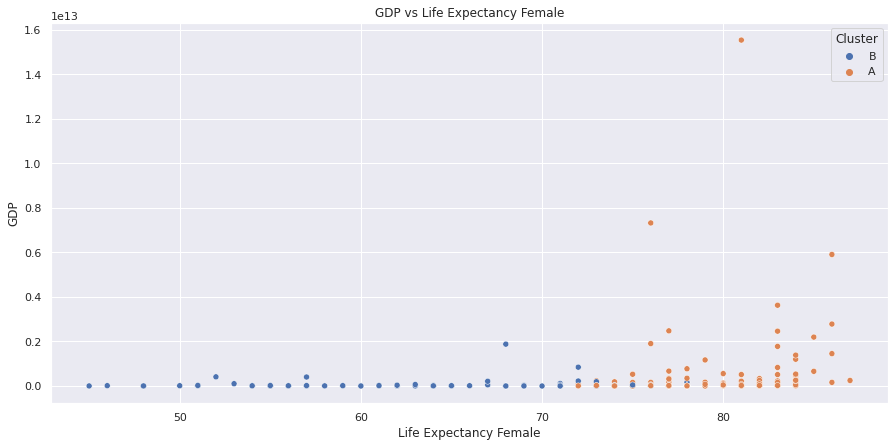

In [209]:
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(x=df['Life Expectancy Female'], y=df['GDP'], data=df, hue=df['Cluster']).set_title('GDP vs Life Expectancy Female')
### It can be seen that the female life expectancy of countries in cluster B is lower compared to A and countries in A have a higher proportion of higher GDP

Text(0.5, 1.0, 'Internet Usage vs Population Urban')

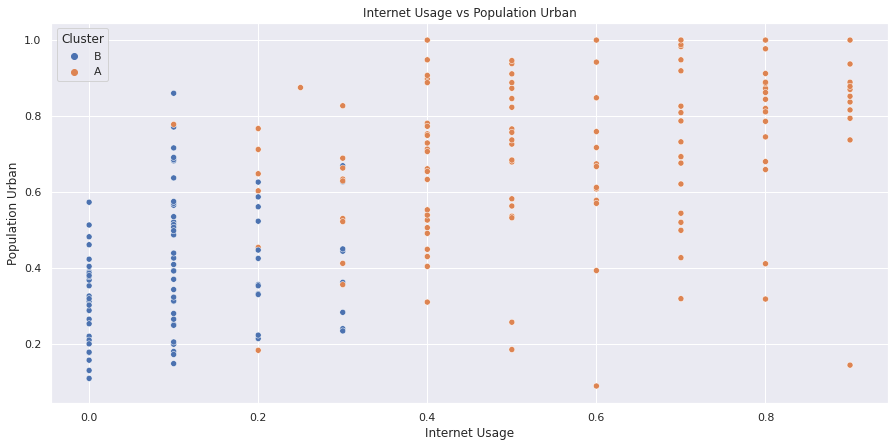

In [210]:
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(x=df['Internet Usage'], y=df['Population Urban'], data=df, hue=df['Cluster']).set_title('Internet Usage vs Population Urban')

### It can be seen that in Cluster A there is a higher urban population and internet usage compared to cluster B

# Converting to HTML

In [205]:
!jupyter nbconvert --to html Project_1_Task_2_Group_76.ipynb

[NbConvertApp] Converting notebook Project_1_Task_2_Group_76.ipynb to html
[NbConvertApp] Writing 804135 bytes to Project_1_Task_2_Group_76.html
